<a href="https://colab.research.google.com/github/sureshmanem/Tensorflow_2.0/blob/master/DefectPredictionAlgoTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Bidirectional,LSTM, Lambda, Conv1D
import datetime
import matplotlib.pyplot as plt
import warnings
from fbprophet import Prophet
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dfCase = pd.read_excel(r'https://github.com/sureshmanem/Tensorflow_2.0/blob/master/Case_cvs.xlsx?raw=true')

In [3]:
dfCase.head(10)

,Case: Case Number,Case: Case Status,Benefit Test Type,Benefit Test Count,Case: Client Commitment Date,Effective Date,Case: Date/Time Opened,Case: Submitted Date,Case: Subject,WA Owner Manager,Work Assignment: Owner Name,Case: Market Segment,Business Area,Case: Level of Difficulty,Case: Age (In Days) Calendar,Client Name,Case: Super Client,Work Assignment: Workflow Assignment Name,Case: Description,Case: # of Plans Affected,Case: Request Type,Case: Related to a Project,Work Assignment: Record Type,Priority,Work Assignment: Created By,Platform ID,Actual Hours of Effort,Work Assignment: Created Date,Work Assignment: Last Modified Date,Case: Case Date/Time Last Modified,Target Completion Date,Case: Testing Target Completion Date,Case: Met Coding TCD,Case: Met Testing TCD,Case: Met Client Commitment Date,Case: Date/Time Closed,Case: In Production Date,Actual End Date,Status,Case: Classification,Case: Source Type,Case: Case Origin
0,4317814,Closed,NaN,NaN,2019-07-01,2019-07-01,2019-05-16 15:19:00,2019-06-25 15:35:00,Baptist Homes Update,Samuel Cormaty,Suchendra Babu Penjuri,Health Plan,HPCST-COMM,Level 3,40,ProAct1,ProAct,QA Design - Baptist Homes Update,Removing co-payments and adding specialty Coin...,1.0,Client Created,0,Parallel Work Assignment,Normal,Michelle Jill,2996,1.0,2019-06-25,2019-06-25,2019-06-25 15:44:00,NaT,NaT,NaN,NaN,Yes,2019-06-25 15:44:00,2019-06-25,2019-06-25 15:38:00,Closed,Benefits,New Business Implementation,Email
1,4008180,Closed,NaN,NaN,2019-01-11,2019-01-01,2019-01-07 16:18:00,2019-01-07 16:18:00,CCO: Vicodin Remove DDL EGWP,Shalin Nath,Saranya Selvaraj,Health Plan,HPCST-MEDD,Level 3,2,MVP MEDICARE D HMO WEST,"MVP Health Plan, Inc.",QA Design - CCO: Vicodin Remove DDL EGWP,Please remove the DDL coding for Hydrocodone/A...,50.0,CCO-Clinical Benefits,0,Parallel Work Assignment,Urgent,Amanda Van Beekum,1501,1.0,2019-01-07,2019-01-09,2019-01-09 16:18:00,2019-01-08,2019-01-10,Yes,Yes,Yes,2019-01-09 16:18:00,2019-01-09,2019-01-09 13:00:00,Closed,CCO Clinical Benefits,Major Request,Email
2,4072187,Closed,NaN,NaN,2019-02-05,2019-02-01,2019-01-29 22:15:00,2019-01-29 22:15:00,MEDICA_MDHC42994,Samuel Cormaty,Jothi Priya Durairaj,Health Plan,HPCST-COMM,Level 3,8,COMM LARGE GROUP MIC MN,Medica Health Plans,QA Design - MEDICA_MDHC42994,MEDICA_MDHC42994,1.0,Benefit Builder,0,Parallel Work Assignment,Normal,Integration Benefit Builder,0281,2.0,2019-01-29,2019-01-31,2019-02-06 16:31:00,2019-01-31,2019-02-04,Yes,Yes,Yes,2019-02-06 16:31:00,2019-02-01,2019-01-31 10:36:00,Closed,Benefits,Minor Request,Email
3,4113046,Closed,NaN,NaN,2019-02-25,2019-03-01,2019-02-18 11:45:00,2019-02-18 11:45:00,CBC 3/1 Alt TF Update,Samuel Cormaty,Suman Punuru,Health Plan,HPCST-MEDD,Level 3,4,Capital BlueCross,Capital BlueCross,QA Design - CBC 3/1 Alt TF Update,Alt TF update Effective 3/1. Please run attach...,1.0,CCO-Clinical Benefits,0,Parallel Work Assignment,Normal,Aaron Peters,8600,1.0,2019-02-18,2019-02-21,2019-02-22 12:37:00,2019-02-19,2019-02-22,Yes,Yes,Yes,2019-02-22 12:37:00,2019-02-22,2019-02-21 09:14:00,Closed,CCO Clinical Benefits,Major Request,Email
4,4162007,Closed,NaN,NaN,2019-03-12,2019-02-28,2019-03-10 19:15:00,2019-03-10 19:15:00,NE Weekly Formulary update 02-28,Shalin Nath,Kameswararao Indrakanti,Health Plan,HPCST-MEDICAID,Level 3,4,WellCare Nebraska Medicaid,WellCare,QA Design - NE Weekly Formulary update 02-28,NE Weekly Formulary update 02-28 See CI for Co...,1.0,Drug Coverage,0,Parallel Work Assignment,Urgent,Julie Simmons,8896,2.0,2019-03-10,2019-03-12,2019-03-14 14:13:00,2019-03-11,2019-03-12,Yes,Yes,Yes,2019-03-14 14:12:00,2019-03-12,2019-03-12 13:30:00,Closed,Benefits,Minor Request,Email
5,4207341,Closed,NaN,NaN,2019-04-02,2019-04-01,2019-03-29 12:13:00,2019-03-29 12:13:00,S040-AM0X BB,Samuel Cormaty,Karthikalakshmi Annamalai,Health Plan,HPCST-COMM,Level 3,3,TUFTS FULLY INS NON SAVER,Tufts Health Plan,QA Design - S040-AM0X BB,NEW BB,1.0,Benefit Builder; Integrated Accumulations; New...,0,Parallel Work Assignment,Norm

In [4]:
dfCase['Business Area'].unique()

array(['HPCST-COMM', 'HPCST-MEDD', 'HPCST-MEDICAID', 'HPCST-EXCH',
       'HPCST-STCOB', 'HPCST-MEDD-DUALS', 'HPCST-BLUES', 'HPCST'],
      dtype=object)

In [5]:
dfCase['Case: Level of Difficulty'].unique()

array(['Level 3', 'Level 2', 'Level 1', nan], dtype=object)

In [6]:
dfCase['Case: Case Origin'].unique()

array(['Email', 'Web', nan, 'Audit', 'Client Meeting',
       'Testing/Validation', 'Meeting', 'Internal-Claims Surveillance'],
      dtype=object)

In [7]:
dfCase.tail(10)

,Case: Case Number,Case: Case Status,Benefit Test Type,Benefit Test Count,Case: Client Commitment Date,Effective Date,Case: Date/Time Opened,Case: Submitted Date,Case: Subject,WA Owner Manager,Work Assignment: Owner Name,Case: Market Segment,Business Area,Case: Level of Difficulty,Case: Age (In Days) Calendar,Client Name,Case: Super Client,Work Assignment: Workflow Assignment Name,Case: Description,Case: # of Plans Affected,Case: Request Type,Case: Related to a Project,Work Assignment: Record Type,Priority,Work Assignment: Created By,Platform ID,Actual Hours of Effort,Work Assignment: Created Date,Work Assignment: Last Modified Date,Case: Case Date/Time Last Modified,Target Completion Date,Case: Testing Target Completion Date,Case: Met Coding TCD,Case: Met Testing TCD,Case: Met Client Commitment Date,Case: Date/Time Closed,Case: In Production Date,Actual End Date,Status,Case: Classification,Case: Source Type,Case: Case Origin
63475,5350199,Test Checkpoint,NaN,NaN,2020-05-28,2020-07-08,2020-05-26 10:44:00,2020-05-26 10:44:00,MVP MOB Dymista PC update,Susan Colucci,YuvaKumar Kasaru,Health Plan,HPCST-COMM,Level 3,0,MVP NY INSURED COMMERCIAL,"MVP Health Plan, Inc.",QA Design - MVP MOB Dymista PC update,See CI for updates.,0.0,CCO-Clinical Benefits,0,Parallel Work Assignment,Urgent,Brandan Walton,1510,3.0,2020-05-26,2020-05-26,2020-05-26 19:32:00,2020-05-26,2020-05-27,Yes,Yes,No,NaT,NaT,2020-05-26 19:28:00,Closed,CCO Clinical Benefits,Production Correction,Email
63476,3363699,Closed,NaN,NaN,2019-05-02,2018-04-02,2018-04-02 13:47:00,2019-03-20 18:44:00,Molina TX Buprenorphine And Suboxone smart coding,Pramesh Dhasmana,Gurumoorthy Shanmugham,Health Plan,HPCST-MEDICAID,Level 3,394,Molina Texas STAR,Molina Healthcare,QA Design - Molina TX Buprenorphine And Suboxo...,Please see attached CI Matrix. Please use date...,1.0,Fill Restrictions,0,Parallel Work Assignment,Urgent,Matthew Van Os,0825,4.0,2019-03-20,2019-03-28,2019-05-01 14:26:00,2019-03-25,2019-03-29,Yes,Yes,Yes,2019-05-01 14:06:00,2019-05-01,2019-03-28 17:28:00,Closed,Benefits,Minor Request,Email
63477,3384229,Closed,NaN,NaN,2019-04-15,2018-04-12,2018-04-12 12:21:00,2019-03-20 20:14:00,Molina TX Nuvigil smart coding,Pramesh Dhasmana,Navin Bangera,Health Plan,HPCST-MEDICAID,Level 3,376,Molina Texas STAR,Molina Healthcare,QA Design - Molina TX Nuvigil smart coding,Please see attached CI Matrix. Please use date...,2.0,Fill Restrictions,0,Parallel Work Assignment,Urgent,Matthew Van Os,0825,5.0,2019-03-20,2019-03-26,2019-04-23 12:59:00,2019-03-22,2019-03-27,Yes,Yes,Yes,2019-04-23 12:59:00,2019-04-12,2019-03-26 17:12:00,Closed,Benefits,Minor Request,Email
63478,3391084,Closed,NaN,NaN,2019-05-09,2018-04-17,2018-04-17 13:33:00,2019-04-13 12:58:00,Molina TX Oxycontin Smart coding,Pramesh Dhasmana,Gurumoorthy Shanmugham,Health Plan,HPCST-MEDICAID,Level 3,412,Molina Texas STAR,Molina Healthcare,QA Design - Molina TX Oxycontin Smart coding,Please see attached CI Matrix. Please use date...,1.0,Fill Restrictions,0,Parallel Work Assignment,Urgent,Matthew Van Os,0825,4.0,2019-04-13,2019-04-29,2019-06-03 15:09:00,2019-04-18,2019-04-30,Yes,Yes,Yes,2019-06-03 15:09:00,2019-05-09,2019-04-29 18:09:00,Closed,Benefits,Project,Email
63479,3369064,Closed,NaN,NaN,2019-04-15,2018-04-04,2018-04-04 17:25:00,2019-03-20 19:39:00,Molina TX Ingrezza smart coding,Nicki Hollerich,Faviola Aguilar,Health Plan,HPCST-MEDICAID,Level 3,384,Molina Texas STAR,Molina Healthcare,QA Design - Molina TX Ingrezza smart coding,Please see attached CI Matrix. Please use date...,2.0,Fill Restrictions,0,Parallel Work Assignment,Urgent,Matthew Van Os,0825,1.0,2019-03-20,2019-03-28,2019-04-23 11:23:00,2019-03-25,2019-03-29,Yes,Yes,Yes,2019-04-23 11:23:00,2019-04-12,2019-03-28 15:08:00,Closed,Benefits,Minor Request,Email
63480,3370001,Closed,NaN,NaN,2019-05-02,2018-04-05,2018-04-05 10:12:00,2019-04-11 13:45:00,Molina TX Lidocaine smart coding,Nicki Hollerich,Faviola Aguilar,Health Plan,HPCST-MEDICAID,Level 3,396,Molina Texas STAR,Moli

In [8]:
dfCase['Case: Market Segment'].unique

<bound method Series.unique of 0        Health Plan
1        Health Plan
2        Health Plan
3        Health Plan
4        Health Plan
            ...     
63480    Health Plan
63481    Health Plan
63482    Health Plan
63483    Health Plan
63484    Health Plan
Name: Case: Market Segment, Length: 63485, dtype: object>

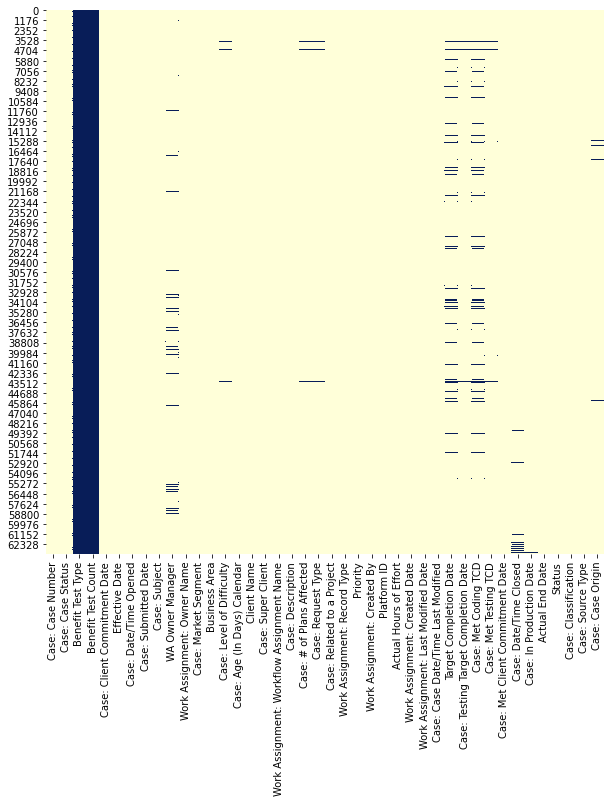

In [9]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(dfCase.isnull(), cbar = False, cmap = 'YlGnBu')

In [10]:
list(dfCase.columns)

['Case: Case Number',
 'Case: Case Status',
 'Benefit Test Type',
 'Benefit Test Count',
 'Case: Client Commitment Date',
 'Effective Date',
 'Case: Date/Time Opened',
 'Case: Submitted Date',
 'Case: Subject',
 'WA Owner Manager',
 'Work Assignment: Owner Name',
 'Case: Market Segment',
 'Business Area',
 'Case: Level of Difficulty',
 'Case: Age (In Days) Calendar',
 'Client Name',
 'Case: Super Client',
 'Work Assignment: Workflow Assignment Name',
 'Case: Description',
 'Case: # of Plans Affected',
 'Case: Request Type',
 'Case: Related to a Project',
 'Work Assignment: Record Type',
 'Priority',
 'Work Assignment: Created By',
 'Platform ID',
 'Actual Hours of Effort',
 'Work Assignment: Created Date',
 'Work Assignment: Last Modified Date',
 'Case: Case Date/Time Last Modified',
 'Target Completion Date',
 'Case: Testing Target Completion Date',
 'Case: Met Coding TCD',
 'Case: Met Testing TCD',
 'Case: Met Client Commitment Date',
 'Case: Date/Time Closed',
 'Case: In Production 

In [11]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
dfCase.drop(['Case: Case Number',
 'Benefit Test Type',
 'Benefit Test Count',
 'Case: Client Commitment Date',
 'Effective Date',
 'Case: Date/Time Opened',
 'Case: Subject',
 'WA Owner Manager',
 'Work Assignment: Owner Name',
 'Case: Market Segment',
 'Client Name',
 'Case: Super Client',
 'Work Assignment: Workflow Assignment Name',
 'Case: Description',
 'Case: # of Plans Affected',
 'Case: Request Type',
 'Case: Related to a Project',
 'Work Assignment: Record Type',
 'Priority',
 'Work Assignment: Created By',
 'Platform ID',
 'Actual Hours of Effort',
 'Work Assignment: Created Date',
 'Work Assignment: Last Modified Date',
 'Case: Case Date/Time Last Modified',
 'Target Completion Date',
 'Case: Testing Target Completion Date',
 'Case: Met Coding TCD',
 'Case: Met Testing TCD',
 'Case: Met Client Commitment Date',
 'Case: Date/Time Closed',
 'Case: In Production Date',
 'Actual End Date',
 'Case: Classification',
 'Case: Source Type',
 'Case: Case Origin'], inplace=True, axis=1)

In [12]:
dfCase.head(5)

,Case: Case Status,Case: Submitted Date,Business Area,Case: Level of Difficulty,Case: Age (In Days) Calendar,Status
0,Closed,2019-06-25 15:35:00,HPCST-COMM,Level 3,40,Closed
1,Closed,2019-01-07 16:18:00,HPCST-MEDD,Level 3,2,Closed
2,Closed,2019-01-29 22:15:00,HPCST-COMM,Level 3,8,Closed
3,Closed,2019-02-18 11:45:00,HPCST-MEDD,Level 3,4,Closed
4,Closed,2019-03-10 19:15:00,HPCST-MEDICAID,Level 3,4,Closed


In [13]:
dfCase.columns

Index(['Case: Case Status', 'Case: Submitted Date', 'Business Area',
       'Case: Level of Difficulty', 'Case: Age (In Days) Calendar', 'Status'],
      dtype='object')

In [14]:
dfCase.columns = ['CaseStatus','SubmittedDate','BusinessArea','CaseLevelOfDifficulty','CaseAgeInCalendarDays','Status']

In [15]:
dfCase.SubmittedDate = pd.to_datetime(dfCase.SubmittedDate, format='%m-%d-%Y %I:%M:%S')

In [16]:
# setting the index to be the date 
dfCase.index = pd.DatetimeIndex(dfCase.SubmittedDate)

In [17]:
dfCase.head()

,CaseStatus,SubmittedDate,BusinessArea,CaseLevelOfDifficulty,CaseAgeInCalendarDays,Status
SubmittedDate,,,,,,
2019-06-25 15:35:00,Closed,2019-06-25 15:35:00,HPCST-COMM,Level 3,40,Closed
2019-01-07 16:18:00,Closed,2019-01-07 16:18:00,HPCST-MEDD,Level 3,2,Closed
2019-01-29 22:15:00,Closed,2019-01-29 22:15:00,HPCST-COMM,Level 3,8,Closed
2019-02-18 11:45:00,Closed,2019-02-18 11:45:00,HPCST-MEDD,Level 3,4,Closed
2019-03-10 19:15:00,Closed,2019-03-10 19:15:00,HPCST-MEDICAID,Level 3,4,Closed


In [18]:
dfCase['BusinessArea'].value_counts()

HPCST-COMM          35510
HPCST-MEDICAID      12388
HPCST-EXCH           7184
HPCST-MEDD           7073
HPCST-MEDD-DUALS      543
HPCST-STCOB           479
HPCST-BLUES           306
HPCST                   2
Name: BusinessArea, dtype: int64

In [19]:
dfCase['CaseLevelOfDifficulty'].value_counts()

Level 3    58769
Level 2     2621
Level 1     1961
Name: CaseLevelOfDifficulty, dtype: int64

In [20]:
dfCase['CaseStatus'].value_counts()

Closed                           62921
Final Review                       407
Pended                              55
Review                              55
Test Checkpoint                     32
Test                                 6
Unpended                             5
Cancellation Review Requested        4
Name: CaseStatus, dtype: int64

In [21]:
dfCase['BusinessArea'].value_counts().iloc[:].index

Index(['HPCST-COMM', 'HPCST-MEDICAID', 'HPCST-EXCH', 'HPCST-MEDD',
       'HPCST-MEDD-DUALS', 'HPCST-STCOB', 'HPCST-BLUES', 'HPCST'],
      dtype='object')

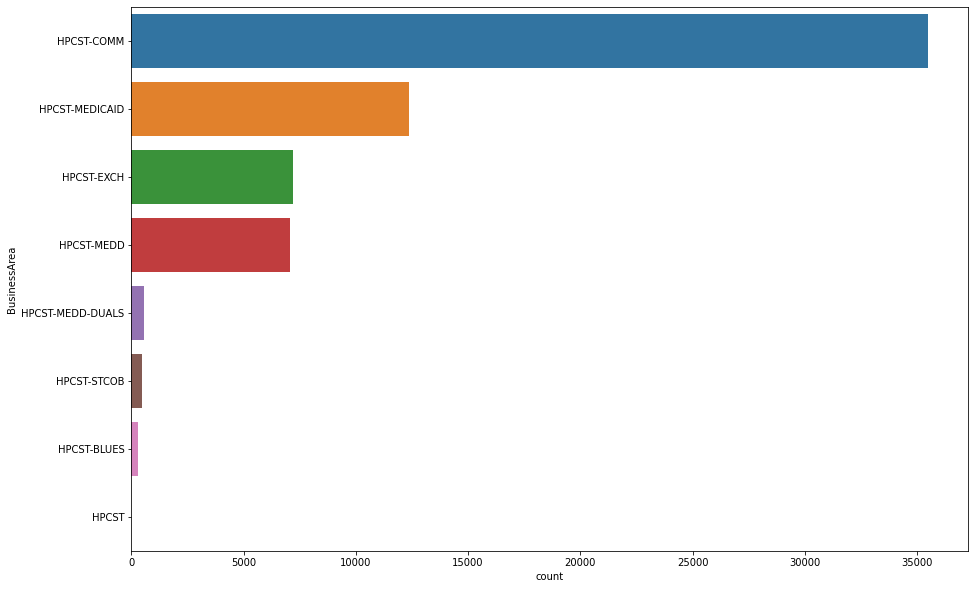

In [22]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'BusinessArea', data = dfCase, order = dfCase['BusinessArea'].value_counts().iloc[:].index)

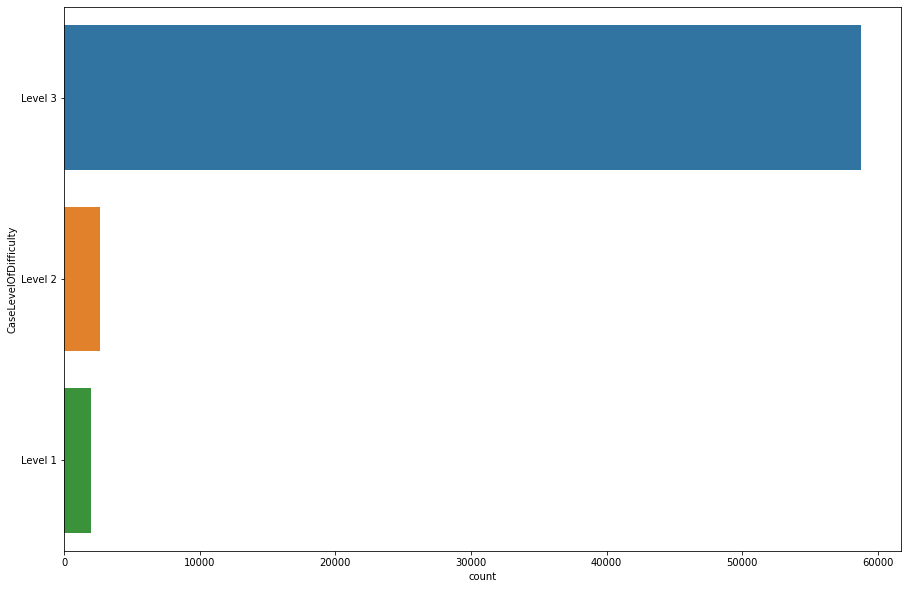

In [23]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'CaseLevelOfDifficulty', data = dfCase, order = dfCase['CaseLevelOfDifficulty'].value_counts().iloc[:].index)

Text(0, 0.5, 'Number of Cases')

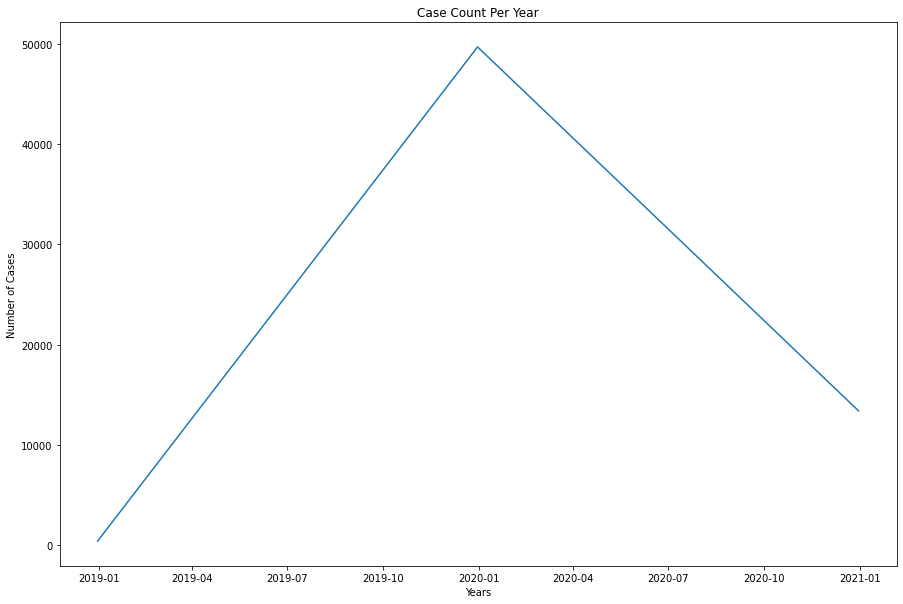

In [24]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (15, 10))
plt.plot(dfCase.resample('Y').size())
plt.title('Case Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

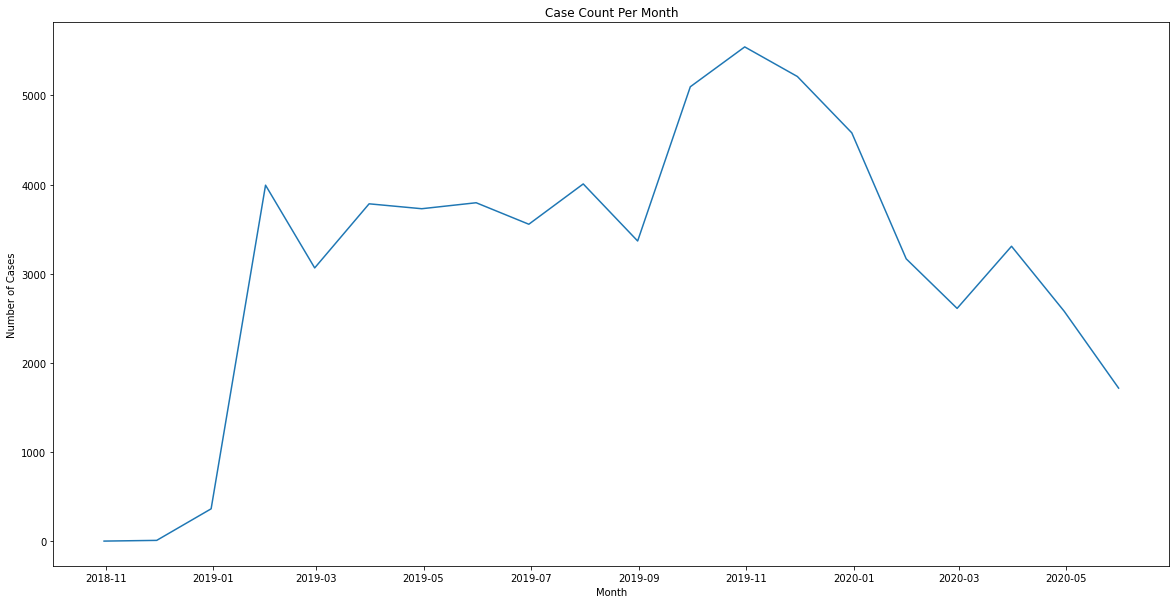

In [25]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (20, 10))
plt.plot(dfCase.resample('M').size())
plt.title('Case Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

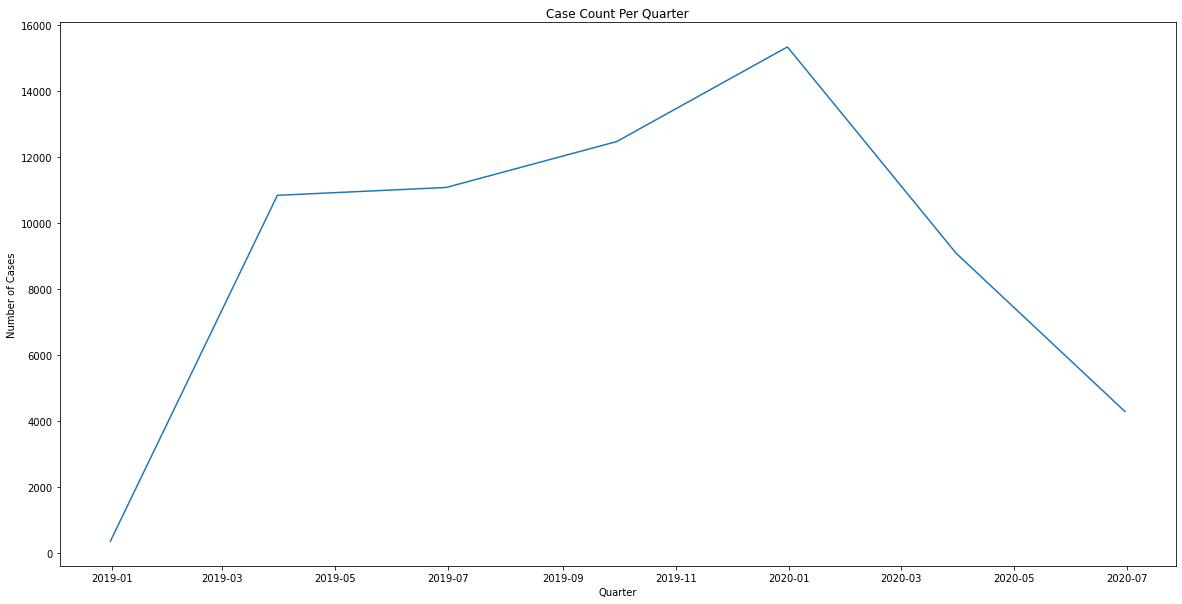

In [26]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize = (20, 10))
plt.plot(dfCase.resample('Q').size())
plt.title('Case Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Cases')

## Step 3: Preparing the data

In [27]:
dfCase_prophet = dfCase.resample('M').size().reset_index()

In [28]:
dfCase_prophet

,SubmittedDate,0
0,2018-10-31,1
1,2018-11-30,9
2,2018-12-31,363
3,2019-01-31,3993
4,2019-02-28,3065
5,2019-03-31,3784
6,2019-04-30,3729
7,2019-05-31,3796
8,2019-06-30,3555
9,2019-07-31,4007


In [29]:
dfCase_prophet.columns = ['Date', 'Case Count']

In [30]:
dfCase_prophet.columns

Index(['Date', 'Case Count'], dtype='object')

In [31]:
dfCase_prophet_final = dfCase_prophet.rename(columns={'Date':'ds', 'Case Count':'y'})

In [32]:
dfCase_prophet_final

,ds,y
0,2018-10-31,1
1,2018-11-30,9
2,2018-12-31,363
3,2019-01-31,3993
4,2019-02-28,3065
5,2019-03-31,3784
6,2019-04-30,3729
7,2019-05-31,3796
8,2019-06-30,3555
9,2019-07-31,4007


In [33]:
m = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
m.fit(dfCase_prophet_final)

INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [34]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

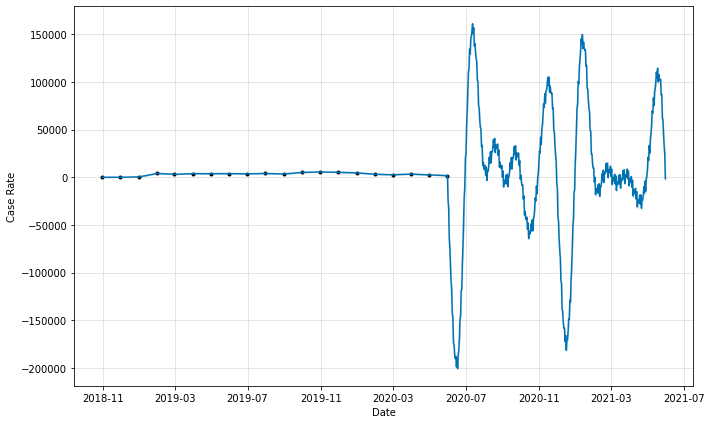

In [35]:
figure = m.plot(forecast, xlabel='Date', ylabel='Case Rate')

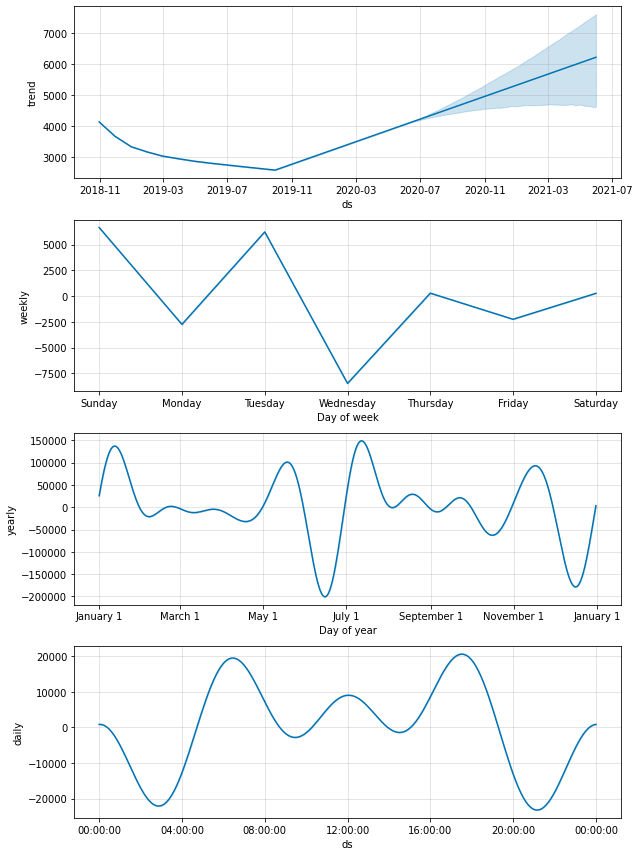

In [36]:
figure3 = m.plot_components(forecast)